In [12]:
import pandas as pd
df = pd.read_csv("data/archive-2/Child 1 Genome.csv",low_memory=False)
df1 = pd.read_csv("data/archive-2/Child 2 Genome.csv",low_memory=False)
df2 = pd.read_csv("data/archive-2/Child 3 Genome.csv",low_memory=False)

df3 = pd.read_csv("data/archive-2/Father Genome.csv",low_memory=False)
df4 = pd.read_csv("data/archive-2/Mother Genome.csv",low_memory=False)

In [13]:
from family_generator import FamilyGenerator
genome_paths = {
        'father': 'data/archive-2/Father Genome.csv',
        'mother': 'data/archive-2/Mother Genome.csv',
        'children': [
            'data/archive-2/Child 1 Genome.csv',
            'data/archive-2/Child 2 Genome.csv',
            'data/archive-2/Child 3 Genome.csv'
        ]
    }
    
family_gen = FamilyGenerator(genome_paths=genome_paths)

🧬 Inicializando los generadores de perfiles genéticos...
Analizando genoma para 'father' desde: data/archive-2/Father Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/base_generator.py:25: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.genome_df = pd.read_csv(self.genome_file, low_memory=True)


Father: Analizando 601,802 SNPs
Analizando genoma para 'mother' desde: data/archive-2/Mother Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/base_generator.py:25: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.genome_df = pd.read_csv(self.genome_file, low_memory=True)


Mother: Analizando 601,802 SNPs

📊 ANALIZANDO GENOMAS DE HIJOS

Cargando perfil para Child 1 desde data/archive-2/Child 1 Genome.csv...
Analizando genoma para 'child_1' desde: data/archive-2/Child 1 Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/base_generator.py:25: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.genome_df = pd.read_csv(self.genome_file, low_memory=True)


Child_1: Analizando 601,802 SNPs
   ✅ Perfil para Child 1 cargado (601,802 SNPs)

Cargando perfil para Child 2 desde data/archive-2/Child 2 Genome.csv...
Analizando genoma para 'child_2' desde: data/archive-2/Child 2 Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/base_generator.py:25: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.genome_df = pd.read_csv(self.genome_file, low_memory=True)


Child_2: Analizando 631,983 SNPs
   ✅ Perfil para Child 2 cargado (631,983 SNPs)

Cargando perfil para Child 3 desde data/archive-2/Child 3 Genome.csv...
Analizando genoma para 'child_3' desde: data/archive-2/Child 3 Genome.csv


/Users/alberto/Desktop/PGVD/producer/family/base_generator.py:25: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  self.genome_df = pd.read_csv(self.genome_file, low_memory=True)


Child_3: Analizando 631,983 SNPs
   ✅ Perfil para Child 3 cargado (631,983 SNPs)

✅ ANÁLISIS DE HIJOS COMPLETADO

✅ Generador de familias listo



# Test

In [ ]:

fathers_data = []
mothers_data = []
p =30
for padre_num in range(1, p+1):
    print(f"\n{'─'*80}")
    print(f"Generando Padre #{padre_num}...")
    print(f"{'─'*80}")
    
    gen = family_gen.father_generator.generate(f"TEST_FAM_{padre_num}")
    h = family_gen.mother_generator.generate(f"TEST_m_{padre_num}")
    
    father_snps = []
    mother_snps = []
    try:
            while True:
                item = next(gen)
                d =next(h)
                father_snps.append(item)
                mother_snps.append(d)
    except StopIteration:
        pass
    
    fathers_data.append({
        'nombre': f'Padre {padre_num}',
        'snps': father_snps
    })
    mothers_data.append({
        'nombre': f'Madre {padre_num}',
        'snps': mother_snps
    })
    
    print(f"✅ Padre #{padre_num}: {len(father_snps):,} SNPs extraídos para análisis")

print(f"\n{'='*80}")
print(f"GENERACIÓN COMPLETADA - {p} Padres generados")
print(f"{'='*80}\n")


────────────────────────────────────────────────────────────────────────────────
Generando Padre #1...
────────────────────────────────────────────────────────────────────────────────
      Padre TEST_FAM_1_F: Iniciando generación vectorizada de 601,802 SNPs (variación: 0.848, mutación: 1.3%)
      🧬 Padre TEST_FAM_1_F: Ensamblando y enviando 601,802 SNPs...
      🧬 Madre TEST_m_1_M: Iniciando generación vectorizada de 601,802 SNPs (variación: 1.081, mutación: 5.4%)
      🧬 Madre TEST_m_1_M: Ensamblando y enviando 601,802 SNPs...
      📊 Padre: Enviados 100,000/601,802 SNPs (16.6%)
      📊 Madre: Enviados 100,000/601,802 SNPs (16.6%)
      📊 Padre: Enviados 200,000/601,802 SNPs (33.2%)
      📊 Madre: Enviados 200,000/601,802 SNPs (33.2%)
      📊 Padre: Enviados 300,000/601,802 SNPs (49.9%)
      📊 Madre: Enviados 300,000/601,802 SNPs (49.9%)
      📊 Padre: Enviados 400,000/601,802 SNPs (66.5%)
      📊 Madre: Enviados 400,000/601,802 SNPs (66.5%)
      📊 Padre: Enviados 500,000/601,802

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('default')
sns.set_palette("husl")

def comparison(_df, fathers_data):
    # Crear DataFrames para cada padre
    comparison_data = []

    # Estadísticas del padre original 
    o_m = _df['position'].mean()
    o_std = _df['position'].std()
    chr_dist_o = _df['chromosome'].value_counts(normalize=True).sort_index()
    gen_dist_o = _df['genotype'].value_counts(normalize=True).sort_index()

    print("Padre Original:")
    print(f"Media posiciones:  {o_m:>15,.0f}")
    print(f"STD posiciones:    {o_std:>15,.0f}")

    # Procesar datos de los padres
    for father in fathers_data:
        chromosomes = [snp['snp_data']['chromosome'] for snp in father['snps']]
        genotypes = [snp['snp_data']['genotype'] for snp in father['snps']]
        positions = [snp['snp_data']['position'] for snp in father['snps']]
        
        # Distribución de cromosomas
        chr_dist = pd.Series(chromosomes).value_counts(normalize=True).sort_index()
        
        # Distribución de genotipos (top 10)
        gen_dist = pd.Series(genotypes).value_counts(normalize=True).head(10)
        
        # Estadísticas de posiciones
        pos_stats = {
            'mean': np.mean(positions),
            'std': np.std(positions),
            'min': np.min(positions),
            'max': np.max(positions)
        }
        
        comparison_data.append({
            'padre': father['nombre'],
            'chr_dist': chr_dist,
            'gen_dist': gen_dist,
            'pos_stats': pos_stats,
            'chromosomes': chromosomes,
            'genotypes': genotypes,
            'positions': positions
        })

    # ============================================================================
    # 1. GRÁFICO DE ESTADÍSTICAS DE POSICIONES 
    # ============================================================================
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    fig.suptitle('📊 COMPARACIÓN DE ESTADÍSTICAS GENÓMICAS', fontsize=16, fontweight='bold')

    # Preparar datos para gráficos
    padres_nombres = ['Original'] + [data['padre'] for data in comparison_data]
    medias = [o_m] + [data['pos_stats']['mean'] for data in comparison_data]
    stds = [o_std] + [data['pos_stats']['std'] for data in comparison_data]

    # Gráfico de medias
    axes[0].bar(padres_nombres, medias, color='skyblue', alpha=0.7)
    axes[0].set_title('Media de Posiciones Genómicas')
    axes[0].set_ylabel('Posición Media')
    axes[0].tick_params(axis='x', rotation=45)
    for i, v in enumerate(medias):
        axes[0].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

    # Gráfico de desviaciones estándar
    axes[1].bar(padres_nombres, stds, color='lightcoral', alpha=0.7)
    axes[1].set_title('Desviación Estándar de Posiciones')
    axes[1].set_ylabel('Desviación Estándar')
    axes[1].tick_params(axis='x', rotation=45)
    for i, v in enumerate(stds):
        axes[1].text(i, v, f'{v:,.0f}', ha='center', va='bottom', fontweight='bold')

    plt.tight_layout()
    plt.show()

    # ============================================================================
    # 2. GRÁFICO DE DISTRIBUCIÓN DE CROMOSOMAS
    # ============================================================================
    plt.figure(figsize=(14, 8))

    # Combinar todas las distribuciones de cromosomas
    all_chr_data = []
    for i, data in enumerate([{'padre': 'Original', 'chr_dist': chr_dist_o}] + comparison_data):
        for chr_num, pct in data['chr_dist'].items():
            all_chr_data.append({
                'Padre': data['padre'],
                'Cromosoma': chr_num,
                'Porcentaje': pct * 100
            })

    chr_df = pd.DataFrame(all_chr_data)

    # Crear heatmap de distribuciones
    pivot_chr = chr_df.pivot(index='Cromosoma', columns='Padre', values='Porcentaje')
    plt.subplot(1, 2, 1)
    sns.heatmap(pivot_chr, annot=True, fmt='.2f', cmap='YlOrRd', cbar_kws={'label': 'Porcentaje (%)'})
    plt.title('Distribución de SNPs por Cromosoma (%)', fontweight='bold')
    plt.xlabel('Padre')
    plt.ylabel('Cromosoma')

    # Gráfico de barras comparativo (primeros 10 cromosomas)
    plt.subplot(1, 2, 2)
    top_chromosomes = chr_df['Cromosoma'].unique()[:10]
    top_chr_df = chr_df[chr_df['Cromosoma'].isin(top_chromosomes)]

    sns.barplot(data=top_chr_df, x='Cromosoma', y='Porcentaje', hue='Padre')
    plt.title('Distribución - Top 10 Cromosomas', fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()
    plt.show()

    # ============================================================================
    # 3. GRÁFICO DE DISTRIBUCIÓN DE GENOTIPOS
    # ============================================================================
    plt.figure(figsize=(12, 6))

    # Combinar distribuciones de genotipos
    all_gen_data = []
    for i, data in enumerate([{'padre': 'Original', 'gen_dist': gen_dist_o}] + comparison_data):
        for gt, pct in data['gen_dist'].items():
            all_gen_data.append({
                'Padre': data['padre'],
                'Genotipo': gt,
                'Porcentaje': pct * 100
            })

    gen_df = pd.DataFrame(all_gen_data)

    # Solo gráfico de barras de genotipos (sin heatmap)
    sns.barplot(data=gen_df, x='Genotipo', y='Porcentaje', hue='Padre')
    plt.title('Distribución de Genotipos Más Comunes', fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # ============================================================================
    # 4. GRÁFICO DE DENSIDAD DE POSICIONES
    # ============================================================================
    plt.figure(figsize=(12, 6))

    # Crear datos para densidad
    all_positions = []
    for i, data in enumerate([{'padre': 'Original', 'positions': _df['position'].tolist()}] + comparison_data):
        for pos in data['positions']:
            all_positions.append({
                'Padre': data['padre'],
                'Posición': pos
            })

    pos_df = pd.DataFrame(all_positions)

    # Gráfico de densidad con colores distintos
    plt.figure(figsize=(12, 6))
    padres_unicos = pos_df['Padre'].unique()
    colores = plt.cm.Set3(np.linspace(0, 1, len(padres_unicos)))
    
    for i, padre in enumerate(padres_unicos):
        subset = pos_df[pos_df['Padre'] == padre]
        sns.kdeplot(data=subset, x='Posición', label=padre, color=colores[i], alpha=0.7, linewidth=2)

    plt.title('Distribución de Densidad de Posiciones Genómicas', fontweight='bold')
    plt.xlabel('Posición en el Genoma')
    plt.ylabel('Densidad')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

    


    

Padre Original:
Media posiciones:       76,382,310
STD posiciones:         56,988,227


/var/folders/0z/81q974151kg7hrf0756m6s940000gn/T/ipykernel_74898/1820403061.py:80: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/alberto/Desktop/PGVD/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


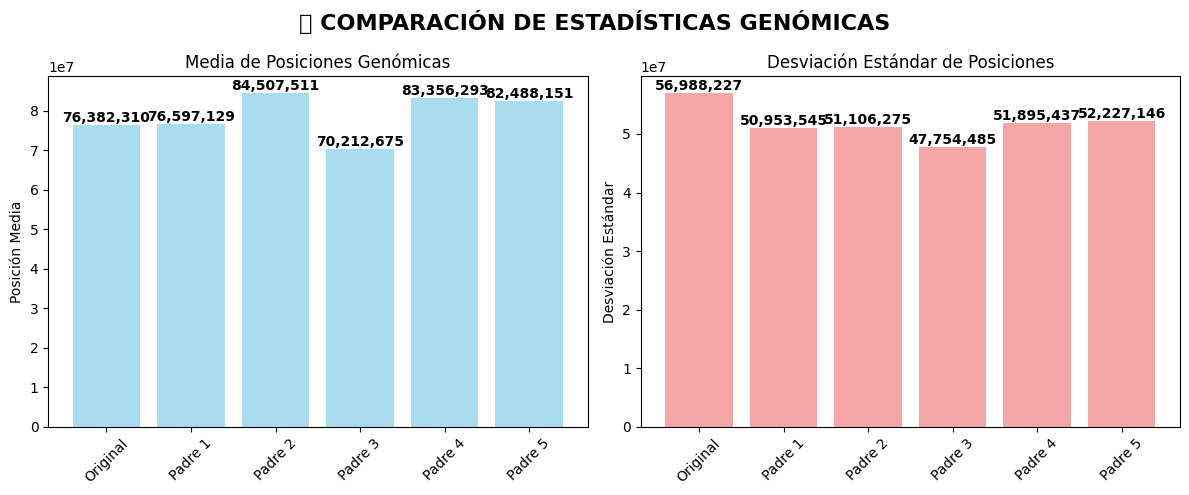

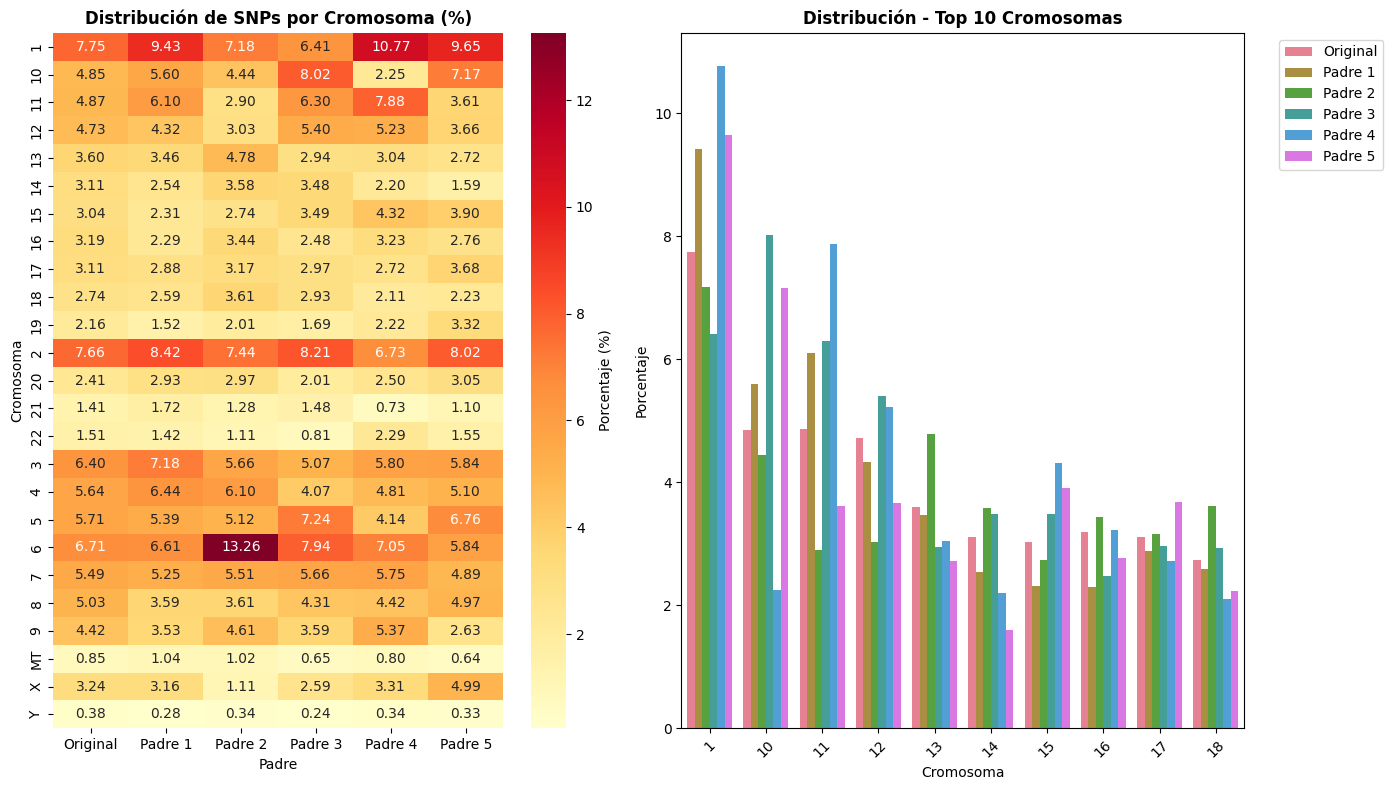

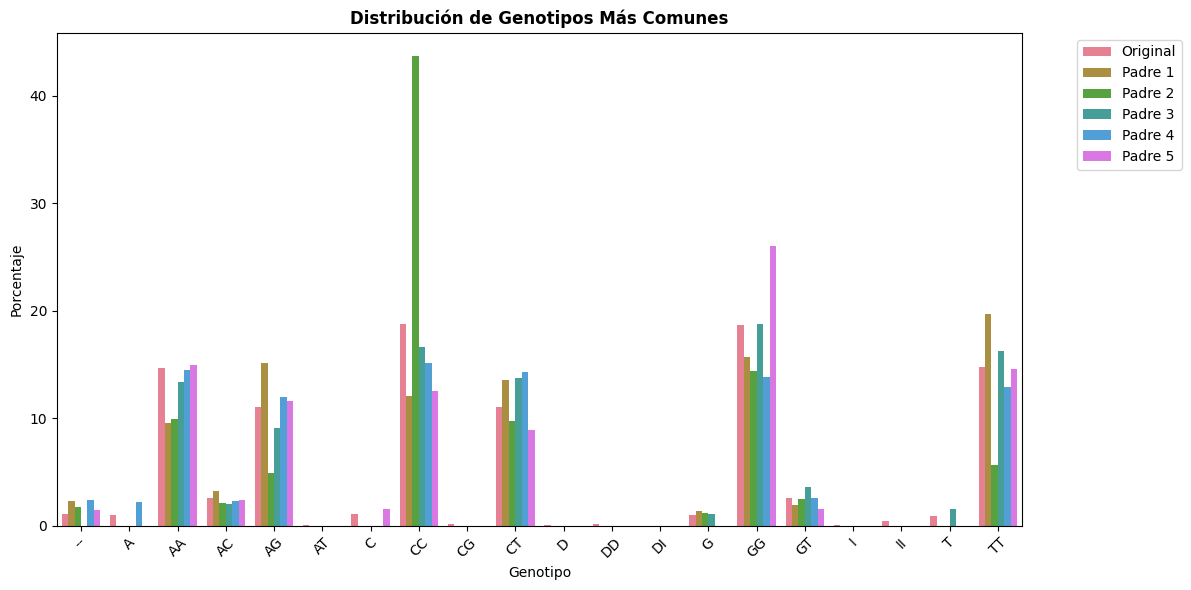

<Figure size 1200x600 with 0 Axes>

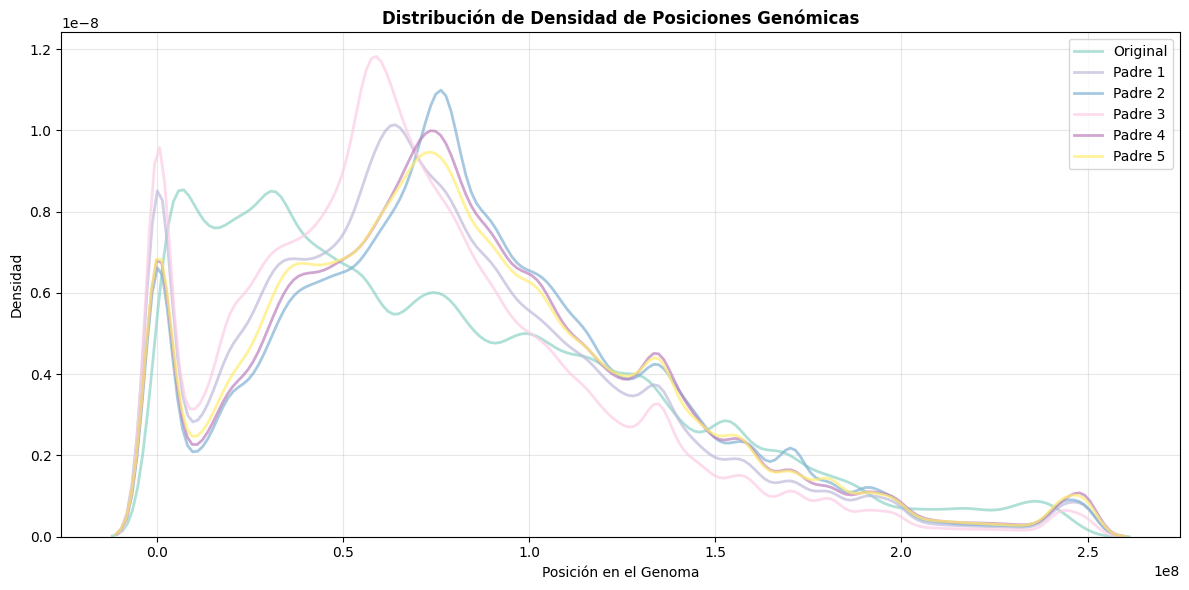

In [ ]:
comparison(df3,fathers_data)

Padre Original:
Media posiciones:       76,382,310
STD posiciones:         56,988,227


/var/folders/0z/81q974151kg7hrf0756m6s940000gn/T/ipykernel_74898/1820403061.py:80: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/alberto/Desktop/PGVD/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


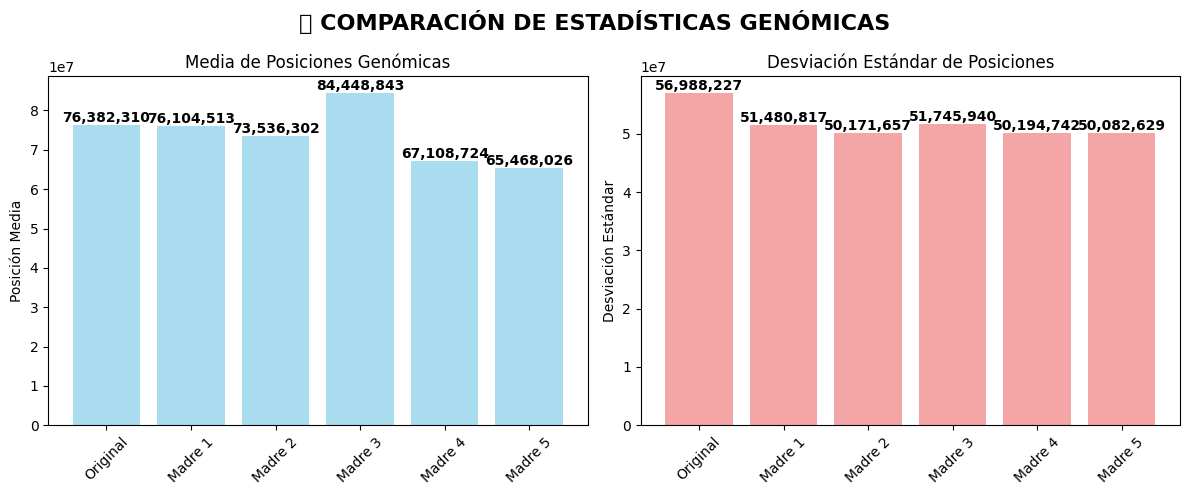

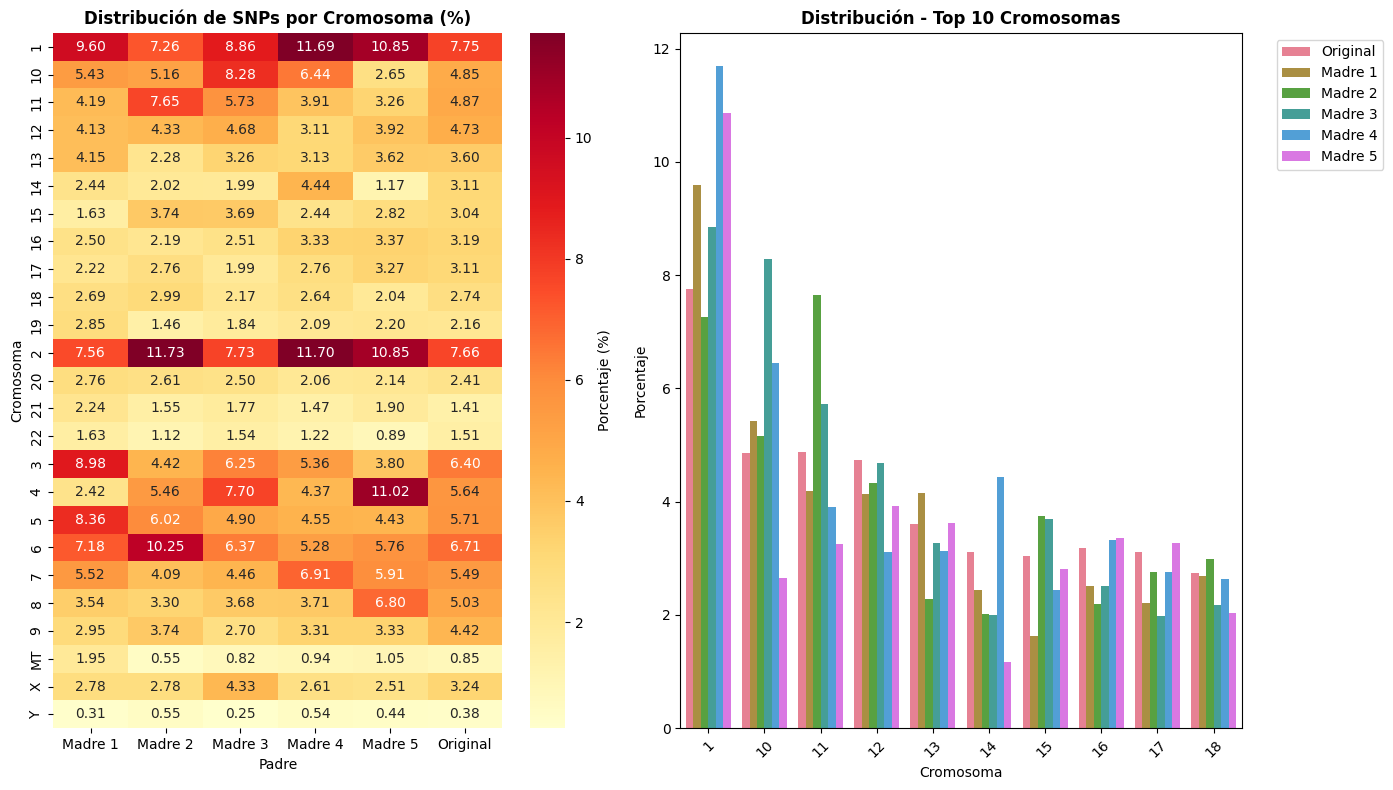

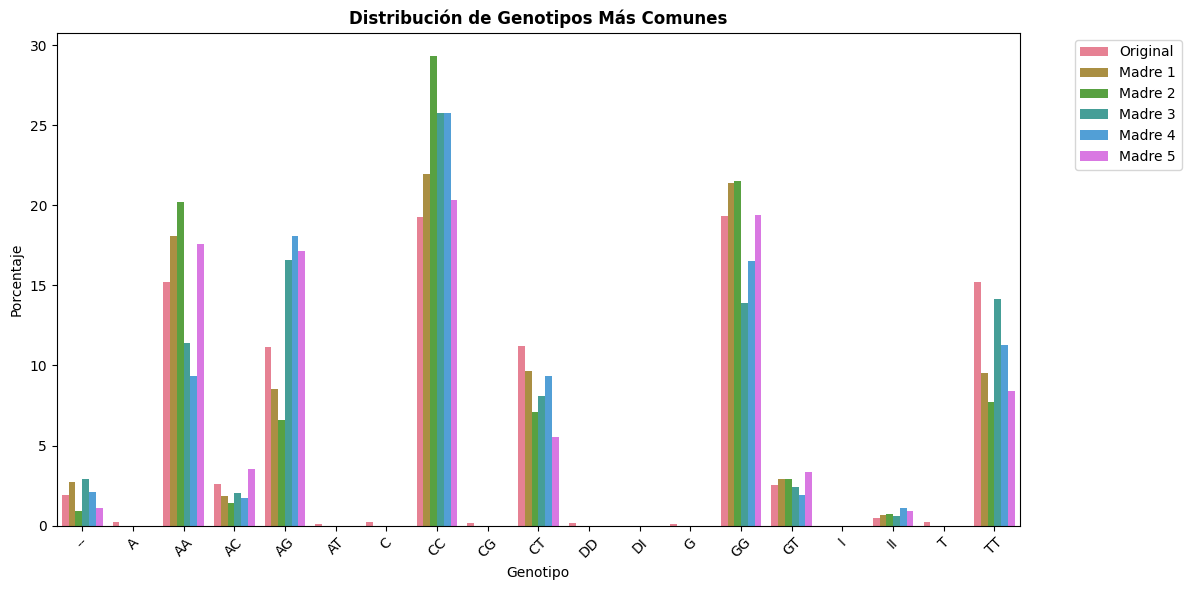

<Figure size 1200x600 with 0 Axes>

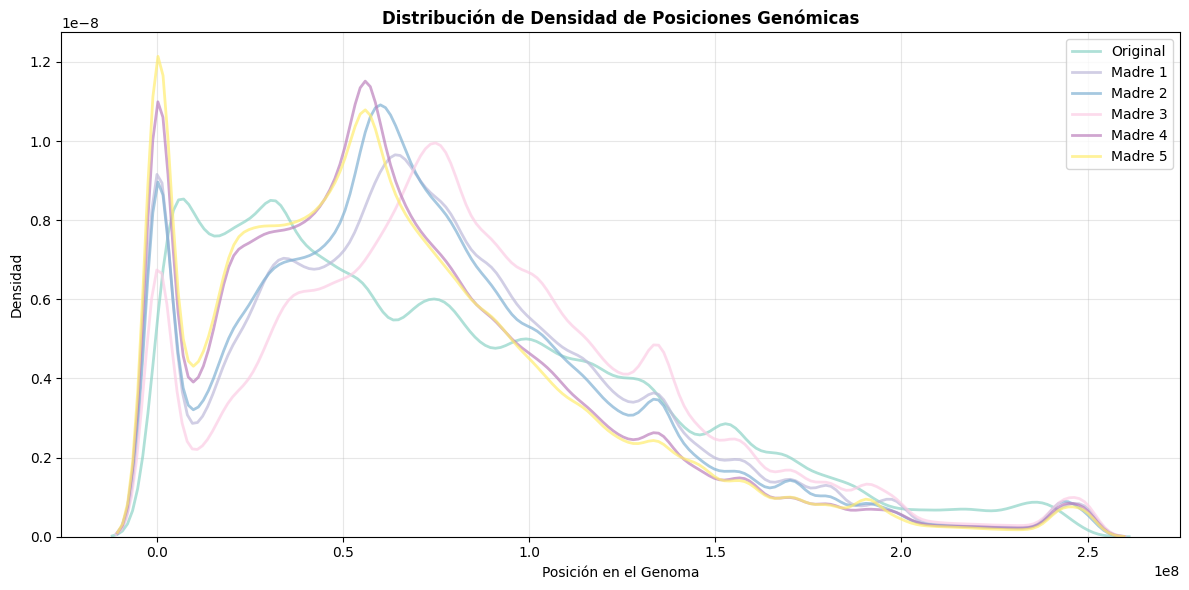

In [ ]:
comparison(df4,mothers_data)